In [1]:
#!pip install tensorflow-gpu

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.8.0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Importing the dataset from kaggle
# Installing Kaggle API
!pip install -q kaggle

In [6]:
# create a directory as kaggle
! mkdir -p ~/.kaggle

In [8]:
#copy API key to kaggle directory
! cp kaggle.json ~/.kaggle/

In [9]:
#disable API key
! chmod 600 /root/.kaggle/kaggle.json

In [10]:
# list of kaggle datasets
! kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39          10602       1457  0.9375           
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                        2MB  2022-05-15 00:01:23           2655         97  1.0              
mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education    6KB  2022-04-16 04:46:28           7132        188  1.0              
paradisejoy/top-hits-spotify-from-20002019   

In [11]:
# importing the dataset
! kaggle competitions download -c santander-customer-satisfaction

 61% 5.00M/8.25M [00:00<00:00, 42.7MB/s]
100% 8.25M/8.25M [00:00<00:00, 60.2MB/s]


In [12]:
# unzipping the dataset
! unzip -q /content/santander-customer-satisfaction.zip

In [13]:
dataset = pd.read_csv("/content/train.csv")

In [14]:
dataset.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [15]:
dataset.shape

(76020, 371)

In [16]:
# selecting independent variables 1st (matrix of features)
x = dataset.drop(labels=['ID','TARGET'],axis=1)

In [17]:
# selecting dependent variables
y = dataset['TARGET']

In [18]:
x.shape,y.shape

((76020, 369), (76020,))

In [19]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
x_train.shape,x_test.shape

((60816, 369), (15204, 369))

## REMOVING CONSTANTS, QUASI-CONSTANTS AND DUPLICATE FEATURES

In [21]:
from sklearn.feature_selection import VarianceThreshold
rm_f = VarianceThreshold(threshold=0.01)

In [22]:
x_train = rm_f.fit_transform(x_train)
x_test = rm_f.transform(x_test)

In [23]:
x_train.shape,x_test.shape

((60816, 266), (15204, 266))

In [24]:
# remove duplicate features
x_train_t = x_train.T
x_test_t = x_test.T

In [25]:
x_train_t = pd.DataFrame(x_train_t)
x_test_t = pd.DataFrame(x_test_t)

In [26]:
x_train_t.shape,x_test_t.shape

((266, 60816), (266, 15204))

In [27]:
# number of duplicate features
x_train_t.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Length: 266, dtype: bool

In [28]:
x_train_t.duplicated().sum()

16

In [29]:
duplicated_features = x_train_t.duplicated()
print(duplicated_features)

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Length: 266, dtype: bool


In [30]:
features_to_keep = [not index for index in duplicated_features]
print(features_to_keep)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, 

In [31]:
x_train = x_train_t[features_to_keep].T
x_test = x_test_t[features_to_keep].T

In [32]:
x_train.shape,x_test.shape

((60816, 250), (15204, 250))

In [33]:
# applying feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
x_train

array([[ 0.03826438, -0.78928712, -0.05257837, ..., -0.01895685,
        -0.01990642,  0.07271318],
       [ 0.03826438, -0.63569505, -0.05257837, ..., -0.01895685,
        -0.01990642,  0.73001879],
       [ 0.03826438,  0.51624549, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.0591358 ],
       ...,
       [ 0.0384475 , -0.78928712, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.27045009],
       [ 0.03826438, -0.25171487, -0.01644412, ..., -0.01895685,
        -0.01990642, -0.28583665],
       [ 0.03826438,  1.66818604, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.23183104]])

In [35]:
x_train.shape,x_test.shape

((60816, 250), (15204, 250))

In [37]:
# reshape the dataset
x_train = x_train.reshape(60816,250,1)
x_test = x_test.reshape(15204,250,1)

In [38]:
x_train.shape,x_test.shape

((60816, 250, 1), (15204, 250, 1))

In [39]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## BUILDING THE MODEL

In [46]:
# Creating the object
model = tf.keras.models.Sequential()

In [47]:
# 1st CNN layer
model.add(tf.keras.layers.Conv1D(filters=32,kernel_size=3,activation="relu",input_shape=(250,1)))
# batch normalization
model.add(tf.keras.layers.BatchNormalization())

In [48]:
# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))
# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [49]:
# 2nd CNN layer
model.add(tf.keras.layers.Conv1D(filters=64,kernel_size=3,activation="relu"))
# batch normalization
model.add(tf.keras.layers.BatchNormalization())
# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))
# dropout layer
model.add(tf.keras.layers.Dropout(0.5))

In [50]:
# 3rd CNN layer
model.add(tf.keras.layers.Conv1D(filters=128,kernel_size=3,activation="relu"))
# batch normalization
model.add(tf.keras.layers.BatchNormalization())
# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))
# dropout layer
model.add(tf.keras.layers.Dropout(0.5))

In [51]:
# flatten layer
model.add(tf.keras.layers.Flatten())
# fully connected layer
model.add(tf.keras.layers.Dense(units=256,activation="relu"))

In [52]:
model.add(tf.keras.layers.Dropout(0.5))

In [53]:
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 248, 32)           128       
                                                                 
 batch_normalization_3 (Batc  (None, 248, 32)          128       
 hNormalization)                                                 
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 124, 32)          0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 124, 32)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 122, 64)           6208      
                                                                 
 batch_normalization_4 (Batc  (None, 122, 64)         

In [55]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00005)
model.compile(optimizer = opt, loss="binary_crossentropy",metrics=["accuracy"])

In [56]:
history = model.fit(x_train,y_train,epochs = 10, validation_data = (x_test,y_test))

Epoch 1/10
1901/1901 [==============================] - 35s 10ms/step - loss: 0.2282 - accuracy: 0.9529 - val_loss: 0.1879 - val_accuracy: 0.9578
Epoch 2/10
1901/1901 [==============================] - 18s 9ms/step - loss: 0.1773 - accuracy: 0.9597 - val_loss: 0.1913 - val_accuracy: 0.9578
Epoch 3/10
1901/1901 [==============================] - 12s 6ms/step - loss: 0.1681 - accuracy: 0.9606 - val_loss: 0.1843 - val_accuracy: 0.9581
Epoch 4/10
1901/1901 [==============================] - 13s 7ms/step - loss: 0.1651 - accuracy: 0.9609 - val_loss: 0.1790 - val_accuracy: 0.9580
Epoch 5/10
1901/1901 [==============================] - 12s 6ms/step - loss: 0.1634 - accuracy: 0.9609 - val_loss: 0.1738 - val_accuracy: 0.9580
Epoch 6/10
1901/1901 [==============================] - 12s 6ms/step - loss: 0.1609 - accuracy: 0.9609 - val_loss: 0.1718 - val_accuracy: 0.9577
Epoch 7/10
1901/1901 [==============================] - 13s 7ms/step - loss: 0.1590 - accuracy: 0.9609 - val_loss: 0.1701 - val_a

## MODEL PREDICTIONS

In [57]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")

In [60]:
print(y_pred[7]),print(y_test[7])

[0]
0


(None, None)

In [61]:
# confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[14568     2]
 [  634     0]]


In [62]:
acc_cm = accuracy_score(y_test,y_pred)

In [63]:
print(acc_cm)

0.9581689029202841


## LEARNING CURVE

In [64]:
# Plotting the learning curve
def learning_curve(history,epoch):
  # training vs validation accuracy
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title("Model Accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(['Train','val'],loc='upper left')
  plt.show()
  # training vs validation loss
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model Loss")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")
  plt.legend(['Train','val'],loc='upper left')
  plt.show()

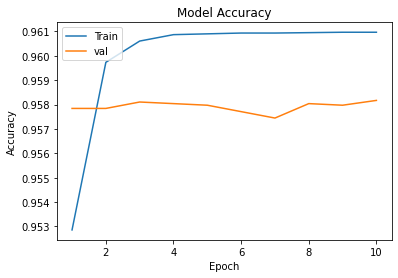

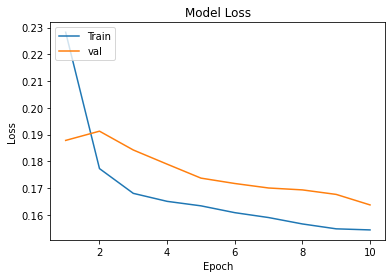

In [65]:
learning_curve(history,10)